In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv("all-data.csv", names=["Sentiment", "Text"], encoding="ISO-8859-1")
df.head()

,Sentiment,Text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentiment  4846 non-null   object
 1   Text       4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [42]:
df.Sentiment.value_counts()

Sentiment
neutral     2879
positive    1363
negative     604
Name: count, dtype: int64

In [43]:
y = df["Sentiment"].values
y.shape

(4846,)

In [44]:
x = df["Text"].values
x.shape

(4846,)

In [45]:
from sklearn.model_selection import train_test_split

(x_train, x_test, y_train, y_test) = train_test_split(x, y, test_size=0.2)

In [46]:
x_train_df = pd.DataFrame(x_train)
x_train_df = x_train_df.rename(columns={0:'text'})

x_test_df = pd.DataFrame(x_test)
x_test_df = x_test_df.rename(columns={0:'text'})

y_train_df = pd.DataFrame(y_train)
y_train_df = y_train_df.rename(columns={0:'sentiment'})

y_test_df = pd.DataFrame(y_test)
y_test_df = y_test_df.rename(columns={0:'sentiment'})

In [49]:
import string

def remove_punct(text):
    if type(text) == float:
        return text
    clean_text = ""
    for t in text:
        if t not in string.punctuation:
            clean_text += t
    return clean_text

In [51]:
x_train_df["text"] = x_train_df["text"].apply(lambda text: remove_punct(text))
x_test_df["text"] = x_test_df["text"].apply(lambda text: remove_punct(text))

In [72]:
df["Text"] = df["Text"].apply(lambda text: remove_punct(text))

In [54]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /home/elias/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [55]:
from nltk.corpus import stopwords

In [63]:
def ngrams(text, n=1, language="english"):
    words = [word for word in text.split(" ") if word not in set(stopwords.words(language))]
    ngrams = zip(*[words[i:] for i in range(0, n)])
    return [" ".join(ngram) for ngram in ngrams]

In [92]:
from collections import defaultdict

positive_values = defaultdict(int)
negative_values = defaultdict(int)
neutral_values = defaultdict(int)

for text in df[df.Sentiment == "positive"].Text:
    for word in ngrams(text, 3):
        positive_values[word] += 1

for text in df[df.Sentiment == "negative"].Text:
    for word in ngrams(text, 3):
        negative_values[word] += 1

for text in df[df.Sentiment == "neutral"].Text:
    for word in ngrams(text, 3):
        neutral_values[word] += 1

df_positive = pd.DataFrame(sorted(positive_values.items(), key=lambda x: x[1], reverse=True))
df_negative = pd.DataFrame(sorted(negative_values.items(), key=lambda x: x[1], reverse=True))
df_neutral = pd.DataFrame(sorted(neutral_values.items(), key=lambda x: x[1], reverse=True))

In [93]:
positive_viz_word_sample = df_positive[0][:10]
positive_viz_freq_sample = df_positive[1][:10]

negative_viz_word_sample = df_negative[0][:10]
negative_viz_freq_sample = df_negative[1][:10]

neutral_viz_word_sample = df_neutral[0][:10]
neutral_viz_freq_sample = df_neutral[1][:10]

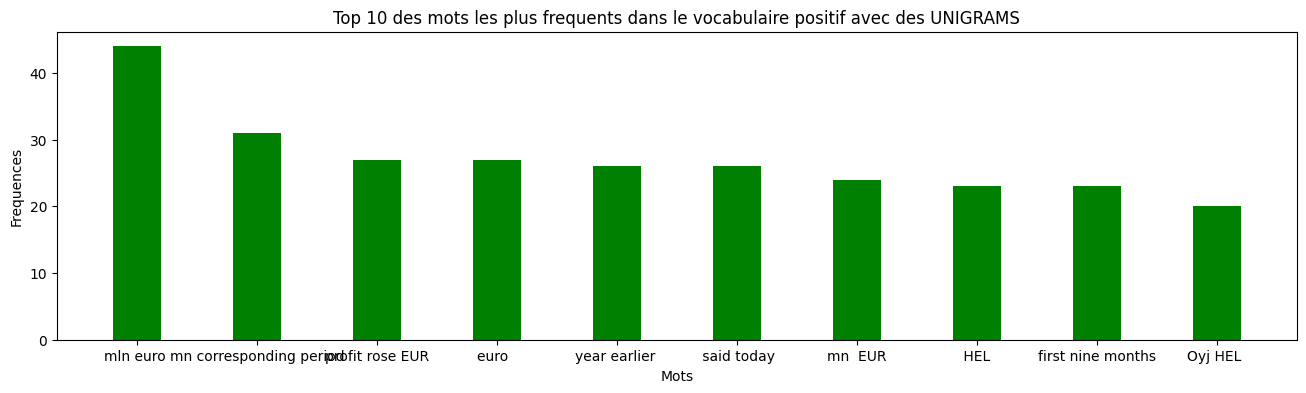

In [94]:
plt.figure(1, figsize=(16,4))
plt.bar(positive_viz_word_sample, positive_viz_freq_sample, color="green", width=0.4)
plt.xlabel("Mots")
plt.ylabel("Frequences")
plt.title("Top 10 des mots les plus frequents dans le vocabulaire positif avec des UNIGRAMS")
plt.show()

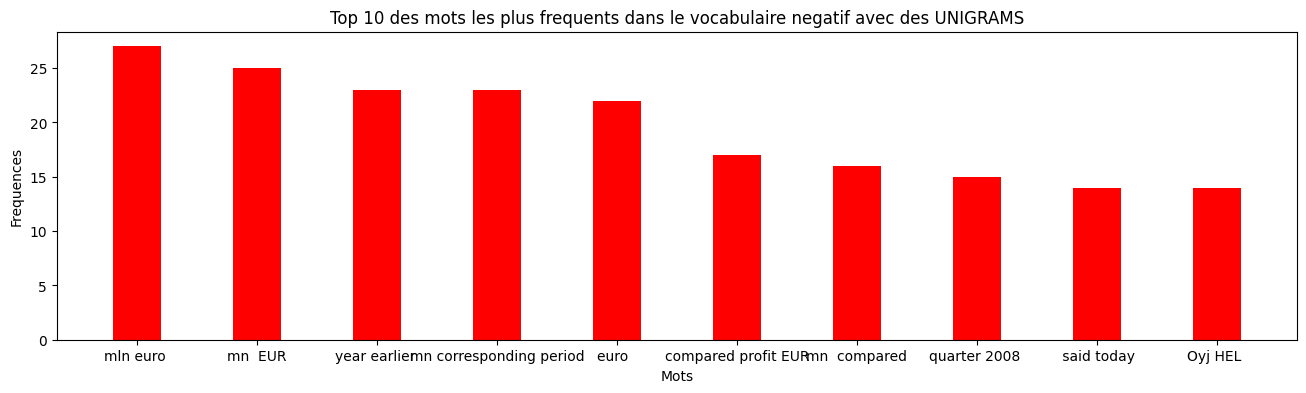

In [95]:
plt.figure(1, figsize=(16,4))
plt.bar(negative_viz_word_sample, negative_viz_freq_sample, color="red", width=0.4)
plt.xlabel("Mots")
plt.ylabel("Frequences")
plt.title("Top 10 des mots les plus frequents dans le vocabulaire negatif avec des UNIGRAMS")
plt.show()

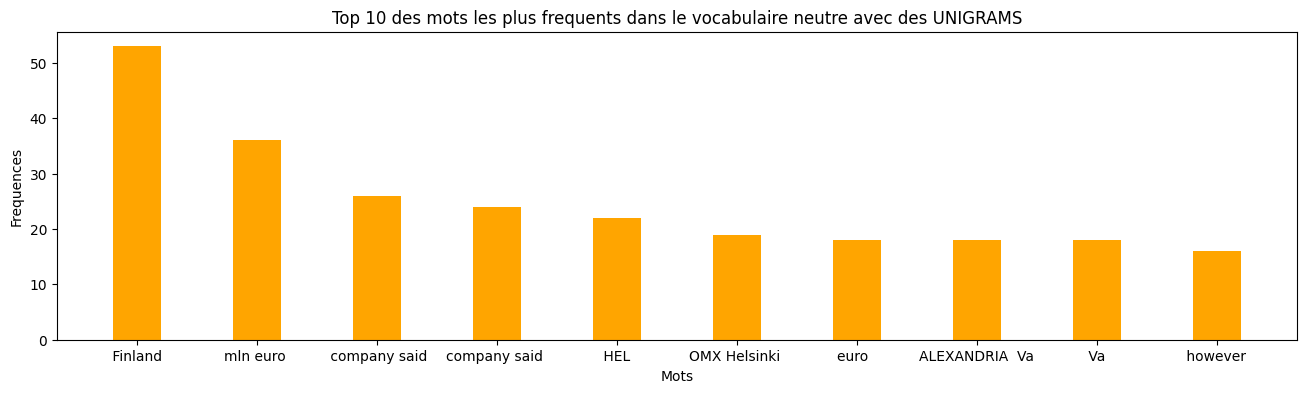

In [96]:
plt.figure(1, figsize=(16,4))
plt.bar(neutral_viz_word_sample, neutral_viz_freq_sample, color="orange", width=0.4)
plt.xlabel("Mots")
plt.ylabel("Frequences")
plt.title("Top 10 des mots les plus frequents dans le vocabulaire neutre avec des UNIGRAMS")
plt.show()